In [1536]:
import numpy as np
import pandas as pd
import os
import kagglehub
import re
import matplotlib.pyplot as plt

📊 **Carregar dados**

In [1537]:
import kagglehub

# Download latest version
caminho = kagglehub.dataset_download("deepcontractor/car-price-prediction-challenge")

for dirname, _, filenames in os.walk(caminho):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/car-price-prediction-challenge/car_price_prediction.csv


In [1538]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [1539]:
cars = pd.read_csv("/content/drive/MyDrive/Datasets/Mineração de Dados/car_price_prediction.csv")

👁️ **Visualização das primeiras linhas**

In [1540]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


📝 **Descrição das Variáveis (colunas)**

-  `ID`: Identificador do carro
-  `Price`: **Alvo**: Preço do carro
-  `Levy`: Taxa/Imposto sobre o carro
-  `Manufacturer`: Fabricante
-  `Model`: Modelo específico do carro
-  `Prod. year`: Ano de fabricação
-  `Category`: Categoria do carro
-  `Leather interior`: Possui interior de couro Yes/No
-  `Fuel type`: Tipo de combustível
-  `Engine volume`: Volume do motor
-  `Mileage`: Quilometragem
-  `Cylinders`: Número de cilindros
-  `Gear box type`: Tipo de câmbio
-  `Drive wheels`: Tração
-  `Doors`: Número de portas"
-  `Wheel`: Lado do volante Left/Right
-  `Color`: Cor do carro
-  `Airbags`: Número de airbags

📊 **Dimensão do Dataset: Registros e Variáveis**

*Nesta etapa, é apresentada a quantidade total de registros (linhas) e variáveis (colunas).*

In [1541]:
df_shape = cars.shape

print(f"Total de Registros: {df_shape[0]}")
print(f"Total de Variáveis: {df_shape[1]}")

Total de Registros: 19237
Total de Variáveis: 18


🔍 **Verificação dos Tipos de Variáveis**

*Nesta etapa, são verificados os tipos de dados de cada variável do dataset. Essa análise é útil para validar a estrutura dos dados e garantir que cada variável esteja no formato adequado para as próximas etapas da análise.*

In [1542]:
cars.dtypes

,0
ID,int64
Price,int64
Levy,object
Manufacturer,object
Model,object
Prod. year,int64
Category,object
Leather interior,object
Fuel type,object
Engine volume,object


**Classificação das variáveis e geração de tabela resumo**

*Nesta etapa, as variáveis do dataset foram classificadas em dois grupos principais: quantitativas (numéricas) e qualitativas (categóricas). Em seguida, foi gerada uma tabela resumo que apresenta, lado a lado, os nomes das variáveis conforme o tipo, facilitando a visualização e análise dos dados.*

In [1543]:
import pandas as pd

# Função para classificar variáveis
def classificar_variaveis(df):
    quantitativas = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    qualitativas = df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()
    return quantitativas, qualitativas

In [1544]:
def gerar_tabela_resumo(quantitativas, qualitativas):
    max_len = max(len(quantitativas), len(qualitativas))
    qnt_pad = quantitativas + [""] * (max_len - len(quantitativas))
    qlt_pad = qualitativas + [""] * (max_len - len(qualitativas))

    tabela = pd.DataFrame({
        "Variáveis Quantitativas": qnt_pad,
        "Variáveis Qualitativas": qlt_pad
    })
    return tabela

In [1545]:
def exibir_dataset_classificado(nome_dataset, df):
    # Classificação
    quantitativas, qualitativas = classificar_variaveis(df)

    # Título
    print(f"\n📋 Dataset: {nome_dataset}")

    # Tamanho
    print(f"\n📊 Total: {df.shape[0]} linhas e {df.shape[1]} colunas")

    # Listas
    print("\n▶ Variáveis Quantitativas:", quantitativas)
    print("▶ Variáveis Qualitativas:", qualitativas)

    # Tabela resumo
    tabela_resumo = gerar_tabela_resumo(quantitativas, qualitativas)
    print("\n\n📋 Tabela Resumo:")
    print(tabela_resumo)

In [1546]:
exibir_dataset_classificado("Cars", cars)


📋 Dataset: Cars

📊 Total: 19237 linhas e 18 colunas

▶ Variáveis Quantitativas: ['ID', 'Price', 'Prod. year', 'Cylinders', 'Airbags']
▶ Variáveis Qualitativas: ['Levy', 'Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Engine volume', 'Mileage', 'Gear box type', 'Drive wheels', 'Doors', 'Wheel', 'Color']


📋 Tabela Resumo:
   Variáveis Quantitativas Variáveis Qualitativas
0                       ID                   Levy
1                    Price           Manufacturer
2               Prod. year                  Model
3                Cylinders               Category
4                  Airbags       Leather interior
5                                       Fuel type
6                                   Engine volume
7                                         Mileage
8                                   Gear box type
9                                    Drive wheels
10                                          Doors
11                                          Wheel
12 

📝 **Observação Sobre a Classificação das Variáveis**


Embora a classificação automática das variáveis com base nos tipos de dados (int64, float64, object) seja útil como ponto de partida, ela não é suficiente para uma análise precisa. Algumas variáveis que aparecem como object são, na verdade, quantitativas disfarçadas, devido à presença de símbolos, unidades ou valores inconsistentes.

Por exemplo:

Levy: representa um valor monetário, mas contém valores ausentes ou símbolos, exigindo limpeza antes da conversão para numérico.

Mileage: está como string com "km", mas representa uma medida contínua.

Doors: deveria ser numérica, mas está como texto, possivelmente por valores como '>5'.

✅ **Classificação Real das Variáveis**

🔢 Variáveis Quantitativas (Numéricas)

-  Price
-  Levy
-  Prod. year
-  Engine volume
-  Mileage
-  Cylinders
-  Airbags
-  Doors

🔠 Variáveis Qualitativas (Categóricas)

-  ID
-  Manufacturer
-  Model
-  Category
-  Leather interior
-  Fuel type
-  Gear box type
-  Drive wheels
-  Wheel
-  Color

# Sprint 03

✨ Verificar valores ausentes

In [1547]:
print("\nValores Ausentes no Dataset:")
cars.isnull().sum()


Valores Ausentes no Dataset:


,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0


✨ Verificar valores duplicados

In [1548]:
print("\nValores Duplicados no Dataset:")
cars.duplicated().sum()


Valores Duplicados no Dataset:


np.int64(313)

📍Remover linhas duplicadas

In [1549]:
cars.drop_duplicates(inplace=True)

In [1550]:
cars.shape

(18924, 18)

✨Analisando os valores únicos em cada coluna:

In [1551]:
for col in cars.columns:
    print(col)
    print(cars[f'{col}'].unique())
    print()
    print('*'*75)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]

***************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]

***************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '79

✨Observando a quantidade de '-' presentes em 'Levy':

In [1552]:
cars['Levy'].value_counts()

,count
Levy,
-,5709
765,482
891,453
639,403
640,398
...,...
2308,1
4860,1
1641,1


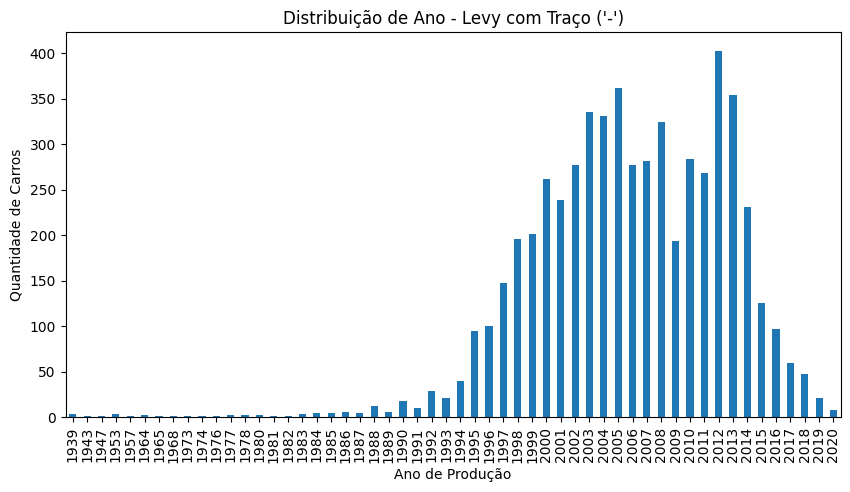

In [1553]:
import matplotlib.pyplot as plt

cars[cars["Levy"] == "-"]["Prod. year"].value_counts().sort_index().plot(kind="bar", figsize=(10,5))
plt.title("Distribuição de Ano - Levy com Traço ('-')")
plt.xlabel("Ano de Produção")
plt.ylabel("Quantidade de Carros")
plt.show()


♦️ A princípio, os '-' poderiam significar um valor de 0,00 na taxa para carros antigos, porém, como observamos no gráfico, há carros de todos os anos que estão preenchidos com '-' no campo da taxa. Então, por enquanto serão removidos os '-' e colocados como Na.

In [1554]:
cars["Levy"] = cars["Levy"].replace("-", np.nan)
cars["Levy"] = pd.to_numeric(cars["Levy"], errors="coerce")

In [1555]:
cars["Levy"].fillna(cars["Levy"].median(), inplace=True)

/tmp/ipython-input-2765592342.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars["Levy"].fillna(cars["Levy"].median(), inplace=True)


In [1556]:
cars['Levy'].isnull().sum()

np.int64(0)

✨Conveter a coluna 'Leather interior' para boleano:

In [1557]:
cars['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)

/tmp/ipython-input-3398133122.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)
/tmp/ipython-input-3398133122.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['Leather interior'].replace({'Yes': True, 'No':False}, in

In [1558]:
cars['Leather interior'].unique()

array([ True, False])

✨Na coluna "Engine volume", há registros que contém "Turbo" no seu valor.  Trataremos essses dados e converteremos o tipo da coluna.

In [1559]:
cars['Engine volume'] = cars['Engine volume'].str.lower()

cars['Turbo'] = cars['Engine volume'].str.contains('turbo')

cars['Engine volume'] = cars['Engine volume'].str.slice(0,3)
cars['Engine volume'] = cars['Engine volume'].astype('float64')

✨Ao invés de apenas remover o termo 'Turbo', imaginamos que poderíamos criar uma nova coluna, com carros que possuem turbo, caso a relação de preço fosse justificada, ou seja, carros com turbo tendem a ser mais caros. E isso se confirmou, confira abaixo!

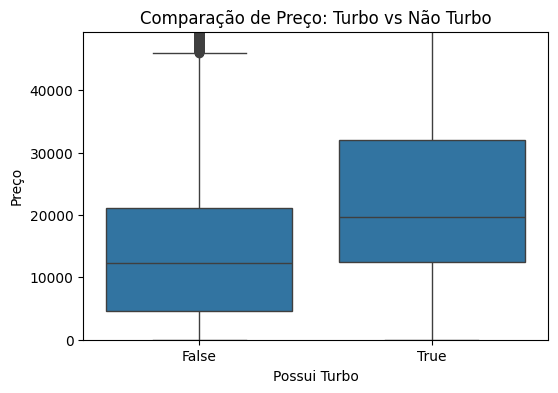

In [1560]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6,4))
sns.boxplot(data=cars, x="Turbo", y="Price")
plt.title("Comparação de Preço: Turbo vs Não Turbo")
plt.ylabel("Preço")
plt.xlabel("Possui Turbo")
plt.ylim(0, cars["Price"].quantile(0.95))  # corta outliers extremos para visual mais limpo
plt.show()

In [1561]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8,False
2,45774419,8467,781.0,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4,False


✨Na coluna 'Mileage' ocorre algo bem semelhante, vamos remover o termo 'km' e converter o campo

In [1562]:
cars['Mileage'] = cars['Mileage'].str.strip('km')
cars['Mileage'] = cars['Mileage'].astype('int64')

✨Na coluna '**Doors**' há apenas 3 valores: '**04-May**', '**02-Mar**', '**>5**', converteremos para inteiros.

In [1563]:
cars['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)

/tmp/ipython-input-819418177.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cars['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)
/tmp/ipython-input-819418177.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  cars['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True

✨Na coluna '**Prod. year**' observamos que há um número baixo de carros bem antigos, esses registros serão removidos para não atrapalhar o modelo

In [1564]:
cars['Prod. year'].value_counts().sort_index()

,count
Prod. year,
1939,3
1943,1
1947,1
1953,4
1957,1
1964,2
1965,2
1968,1
1973,1


In [1565]:
cars = cars[cars["Prod. year"] >= 1984]

In [1566]:
cars.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,45654403,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,44731507,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,45774419,8467,781.0,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,45769185,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,45809263,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [1567]:
cars.describe()

,ID,Price,Levy,Prod. year,Engine volume,Mileage,Cylinders,Doors,Airbags
count,1.889500e+04,1.889500e+04,18895.000000,18895.000000,18895.000000,1.889500e+04,18895.000000,18895.000000,18895.000000
mean,4.557890e+07,1.859333e+04,868.464673,2010.983541,2.306367,1.443966e+06,4.580048,3.926224,6.575761
std,9.027487e+05,1.922801e+05,391.037915,5.355420,0.876835,4.627706e+07,1.199279,0.402251,4.319166
min,2.324298e+07,1.000000e+00,87.000000,1984.000000,0.000000,0.000000e+00,1.000000,2.000000,0.000000
25%,4.569499e+07,5.331000e+03,730.000000,2009.000000,1.800000,7.032450e+04,4.000000,4.000000,4.000000
50%,4.577190e+07,1.317200e+04,781.000000,2012.000000,2.000000,1.264000e+05,4.000000,4.000000,6.000000
75%,4.580175e+07,2.209050e+04,917.000000,2015.000000,2.500000,1.892375e+05,4.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,11714.000000,2020.000000,20.000000,2.147484e+09,16.000000,5.000000,16.000000


In [1568]:
cars[cars['Price']<500]

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
27,45804684,30,781.0,TOYOTA,Prius,2008,Sedan,False,Hybrid,1.5,169000,4.0,Automatic,Front,4,Left wheel,White,8,False
33,45770026,125,1750.0,TOYOTA,Highlander,2008,Sedan,True,Hybrid,3.3,287274,6.0,Automatic,4x4,4,Left wheel,White,12,False
39,45661296,314,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,382746,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
45,45769564,220,1194.0,TOYOTA,Tacoma,2013,Jeep,True,Petrol,4.0,239342,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
53,45769316,392,1017.0,MERCEDES-BENZ,E 300,2017,Sedan,True,Petrol,2.0,1600,4.0,Automatic,Rear,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19215,45763841,470,831.0,HYUNDAI,Elantra,2017,Sedan,True,Petrol,1.6,25635,4.0,Automatic,Front,4,Left wheel,Black,12,False
19218,45748699,30,781.0,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19229,39977395,50,781.0,TOYOTA,Prius,2008,Hatchback,False,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,45760891,470,645.0,TOYOTA,Prius,2011,Hatchback,True,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,False


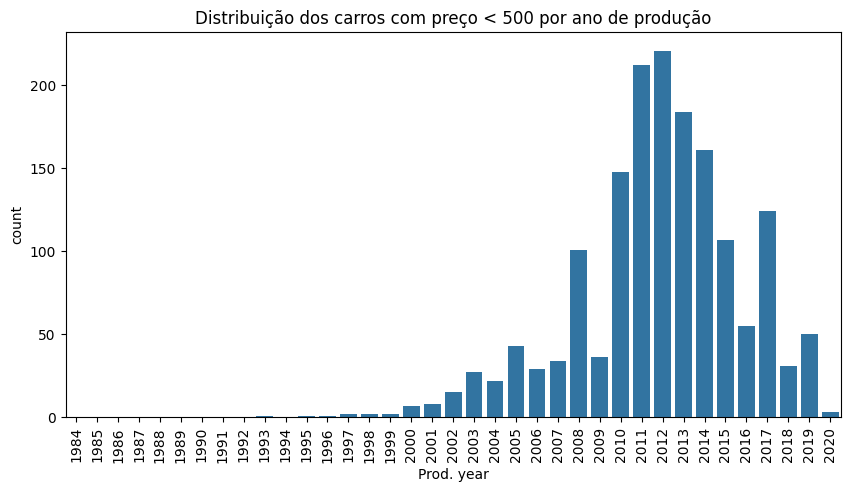

In [1569]:
import seaborn as sns
import matplotlib.pyplot as plt

filt = cars['Price'] < 500
plt.figure(figsize=(10,5))
sns.countplot(data=cars[filt], x='Prod. year', order=sorted(cars['Prod. year'].unique()))
plt.xticks(rotation=90)
plt.title("Distribuição dos carros com preço < 500 por ano de produção")
plt.show()


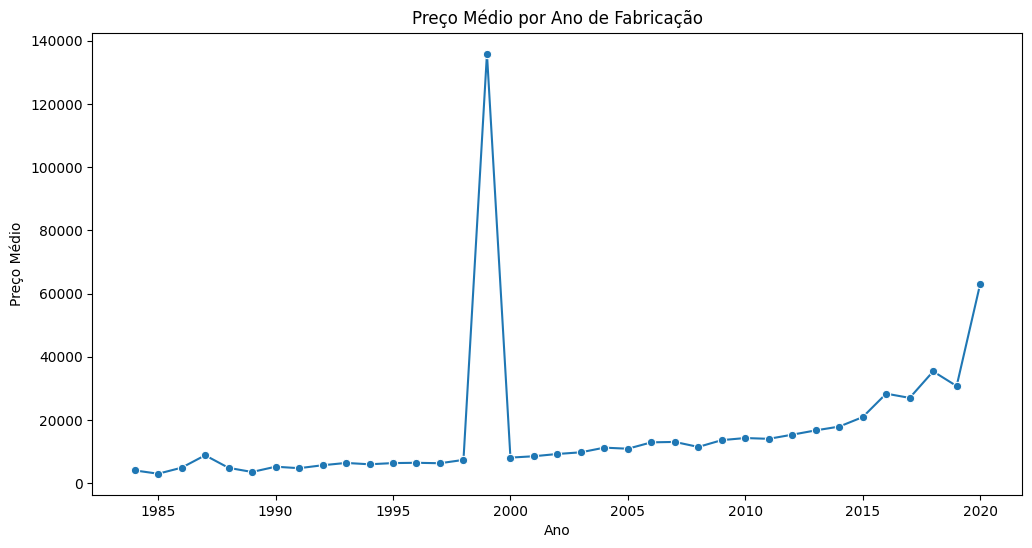

In [1570]:

# Preço Médio por Ano de Fabricação
plt.figure(figsize=(12, 6))
ano_preco = cars.groupby('Prod. year')['Price'].mean().sort_index()
sns.lineplot(x=ano_preco.index, y=ano_preco.values, marker='o')
plt.title("Preço Médio por Ano de Fabricação")
plt.xlabel("Ano")
plt.ylabel("Preço Médio")
plt.show()


<h2> Atividades (Sprint 3)


1. Sumarizar as variáveis quantitativas:

  • Calcule medidas de tendência central: média, mediana e moda.

  • Calcule medidas de dispersão: desvio padrão, variância, valores mínimo e máximo, quartis.

  • Utilize a função .describe() do pandas e/ou crie uma tabela própria.

In [1571]:
# Cálculo da média, mediana e moda das colunas.

# Lista de colunas quantitativas
colunas_quantitativas = ['Price','Prod. year','Engine volume','Mileage','Cylinders','Doors','Airbags']

for c in colunas_quantitativas:
    s = cars[c].dropna()
    print("-----")
    print("Coluna:", c)
    print("Count:", s.count())
    print("Média:", int(s.mean()))
    print("Mediana:", s.median())
    modes = s.mode()
    print("Moda(s):", ", ".join(map(str, modes.tolist())))
    print()

-----
Coluna: Price
Count: 18895
Média: 18593
Mediana: 13172.0
Moda(s): 15681

-----
Coluna: Prod. year
Count: 18895
Média: 2010
Mediana: 2012.0
Moda(s): 2012

-----
Coluna: Engine volume
Count: 18895
Média: 2
Mediana: 2.0
Moda(s): 2.0

-----
Coluna: Mileage
Count: 18895
Média: 1443966
Mediana: 126400.0
Moda(s): 0

-----
Coluna: Cylinders
Count: 18895
Média: 4
Mediana: 4.0
Moda(s): 4.0

-----
Coluna: Doors
Count: 18895
Média: 3
Mediana: 4.0
Moda(s): 4

-----
Coluna: Airbags
Count: 18895
Média: 6
Mediana: 6.0
Moda(s): 4



In [1572]:
# Cálculo do desvio padrão, variância, valores mínimo e máximo, quartis.

for c in colunas_quantitativas:
    s = cars[c].dropna()  # ignora NaNs
    print("-----")
    print("Coluna:", c)
    print("Desvio padrão:", s.std())
    print("Variância:", s.var())
    print("Valor mínimo:", s.min())
    print("Valor máximo:", s.max())
    print("Q1 (25%):", s.quantile(0.25))
    print("Q2 (50% - mediana):", s.quantile(0.5))
    print("Q3 (75%):", s.quantile(0.75))
    print()

-----
Coluna: Price
Desvio padrão: 192280.08015766524
Variância: 36971629225.43817
Valor mínimo: 1
Valor máximo: 26307500
Q1 (25%): 5331.0
Q2 (50% - mediana): 13172.0
Q3 (75%): 22090.5

-----
Coluna: Prod. year
Desvio padrão: 5.355420358050352
Variância: 28.680527211420156
Valor mínimo: 1984
Valor máximo: 2020
Q1 (25%): 2009.0
Q2 (50% - mediana): 2012.0
Q3 (75%): 2015.0

-----
Coluna: Engine volume
Desvio padrão: 0.8768346484101558
Variância: 0.7688390006525616
Valor mínimo: 0.0
Valor máximo: 20.0
Q1 (25%): 1.8
Q2 (50% - mediana): 2.0
Q3 (75%): 2.5

-----
Coluna: Mileage
Desvio padrão: 46277063.40156938
Variância: 2141566597072872.2
Valor mínimo: 0
Valor máximo: 2147483647
Q1 (25%): 70324.5
Q2 (50% - mediana): 126400.0
Q3 (75%): 189237.5

-----
Coluna: Cylinders
Desvio padrão: 1.199279051035944
Variância: 1.438270242253674
Valor mínimo: 1.0
Valor máximo: 16.0
Q1 (25%): 4.0
Q2 (50% - mediana): 4.0
Q3 (75%): 4.0

-----
Coluna: Doors
Desvio padrão: 0.4022507382885364
Variância: 0.16180565

2. Explorar as variáveis qualitativas:

  • Conte a frequência absoluta de cada categoria.
  
  • Calcule a frequência relativa (%).

  • Crie uma tabela resumo com esses dados.

In [1573]:
# Lista de colunas qualitativas
colunas_qualitativas = ['Manufacturer', 'Model', 'Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color']

for col in colunas_qualitativas:
    print("-----")
    print(f"Coluna: {col}")
    freq_abs = cars[col].value_counts(dropna=False)  # frequência absoluta
    freq_rel = cars[col].value_counts(normalize=True, dropna=False) * 100  # frequência relativa (%)

    resumo = pd.DataFrame({
        'Frequência absoluta': freq_abs,
        'Frequência relativa (%)': freq_rel.round(2)
    })

    print(resumo)
    print()

-----
Coluna: Manufacturer
               Frequência absoluta  Frequência relativa (%)
Manufacturer                                               
HYUNDAI                       3729                    19.74
TOYOTA                        3606                    19.08
MERCEDES-BENZ                 2041                    10.80
FORD                          1086                     5.75
CHEVROLET                     1046                     5.54
...                            ...                      ...
MOSKVICH                         1                     0.01
PONTIAC                          1                     0.01
SATURN                           1                     0.01
ASTON MARTIN                     1                     0.01
GREATWALL                        1                     0.01

[64 rows x 2 columns]

-----
Coluna: Model
                Frequência absoluta  Frequência relativa (%)
Model                                                       
Prius                      

A frequência da ocorrência de valores nulos ou desconhecido pode causar distorções de resultados na análise, dependendo do seu valor. Se a frequência da ocorrência for pequena (menor que 5%), avalia-se remover as linhas com os valores nulos. Se for uma proporção média (entre 5% e 30%), o preenchimento com média, mediana e moda pode ser pensado. Se for uma proporção maior, talvez seja mais vantajoso remover a coluna.

5. Visualizações básicas:

  • Histogramas para variáveis quantitativas.

  • Gráficos de barras para variáveis qualitativas.

  • Boxplots para investigar presença de outliers.
  
  • Gráficos de dispersão para possíveis relações entre duas variáveis numéricas.

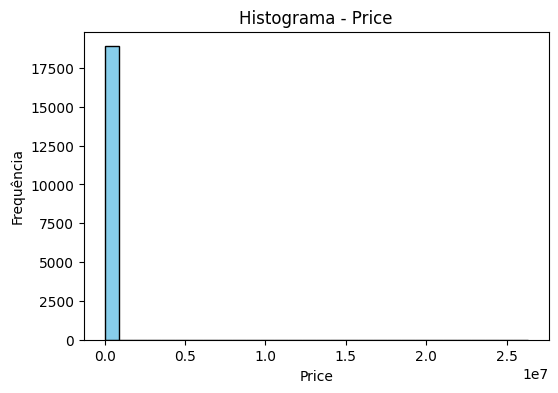

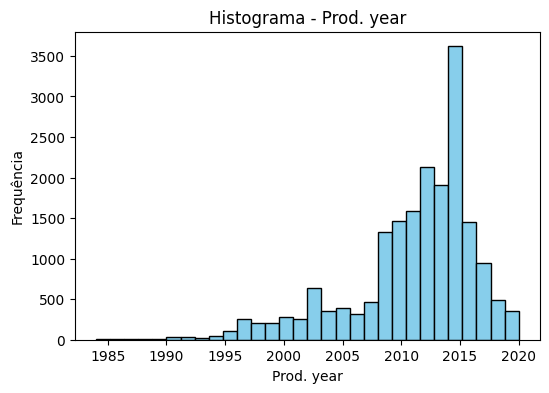

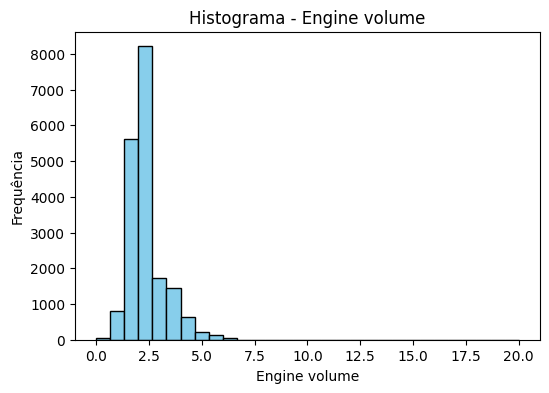

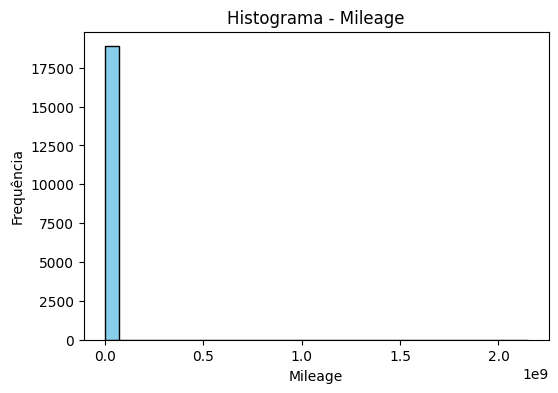

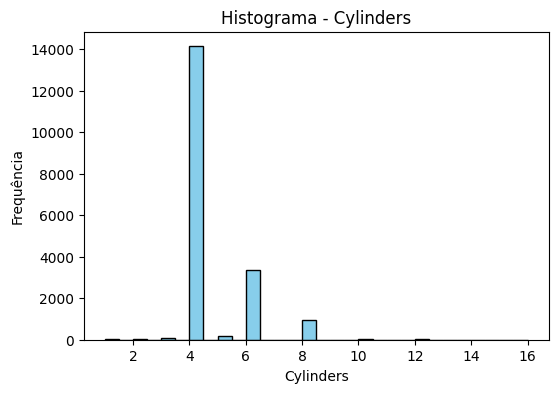

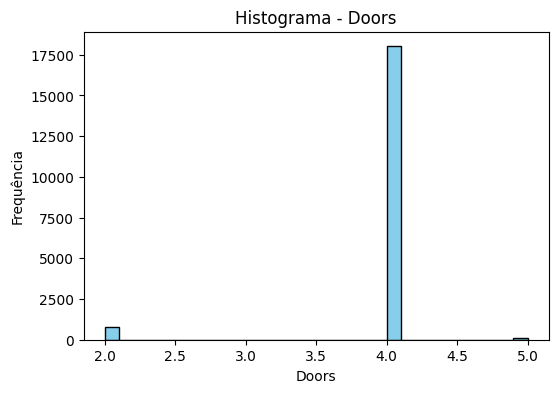

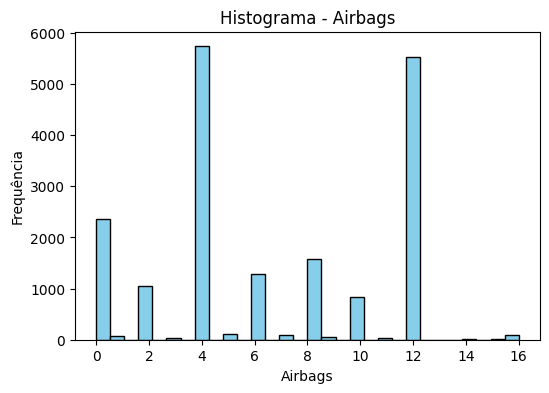

In [1574]:
# Histogramas
for col in colunas_quantitativas:

    plt.figure(figsize=(6,4))
    plt.hist(cars[col].dropna(), bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histograma - {col}')
    plt.xlabel(col)
    plt.ylabel('Frequência')
    plt.show()

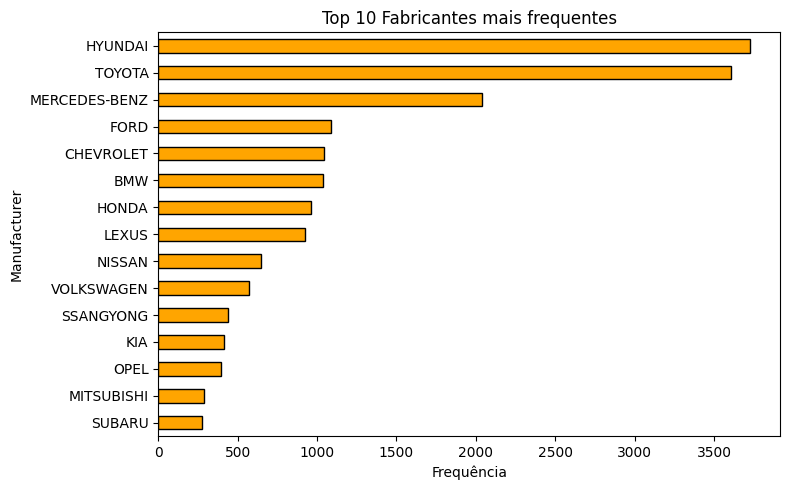

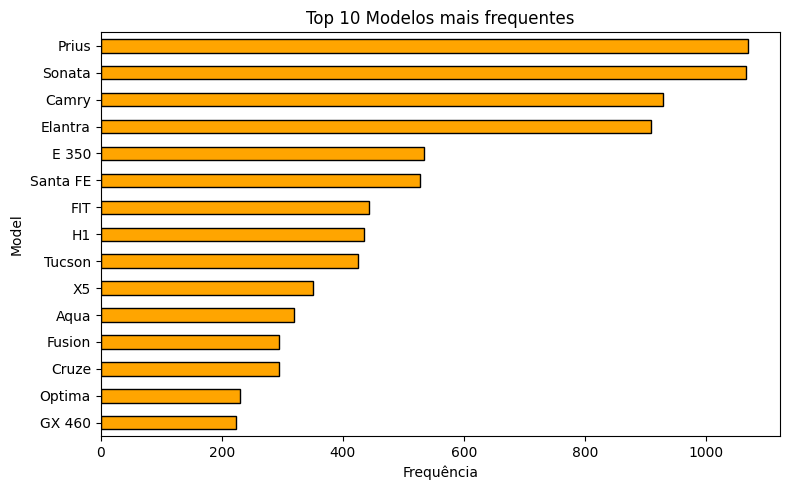

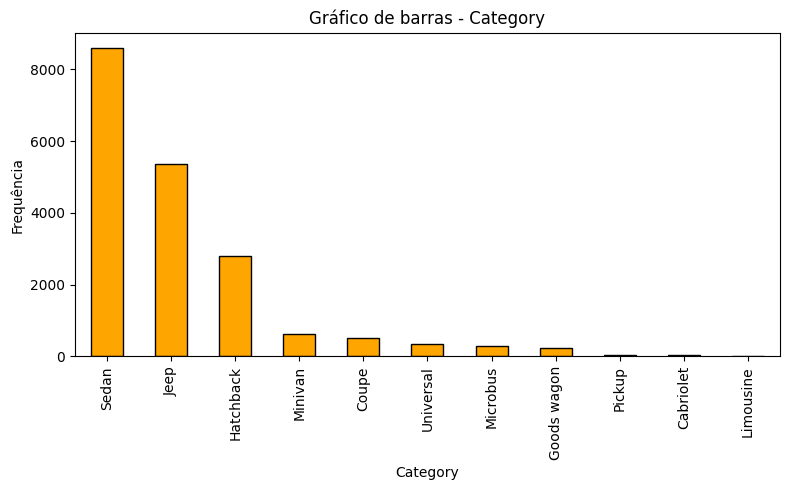

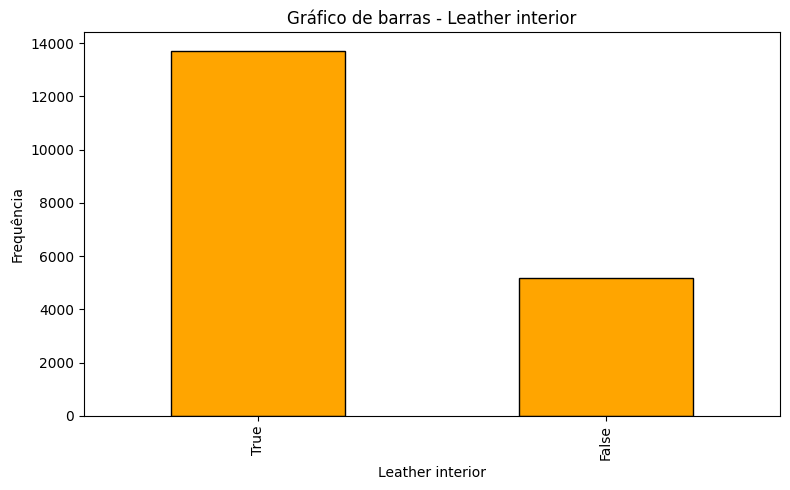

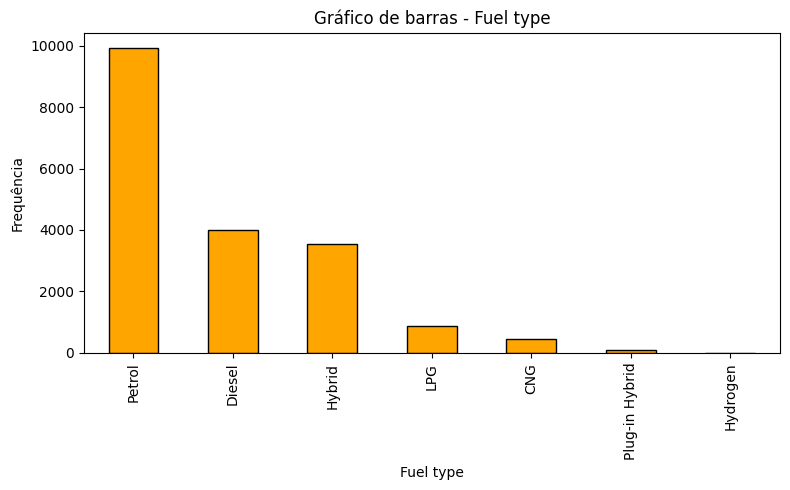

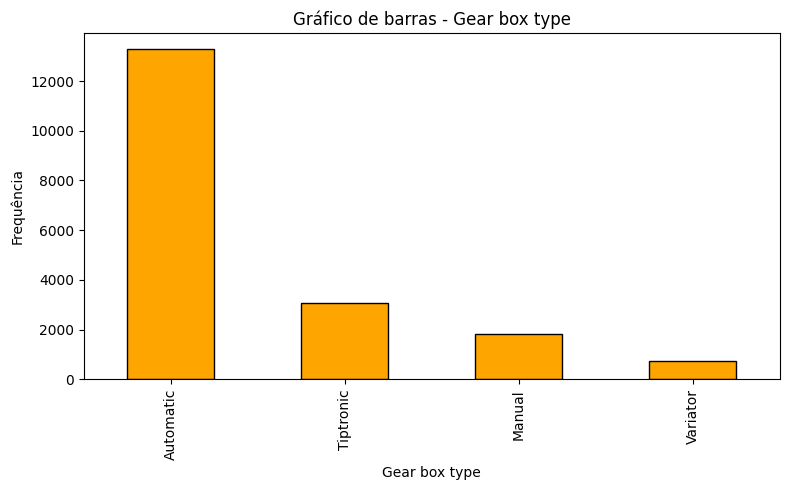

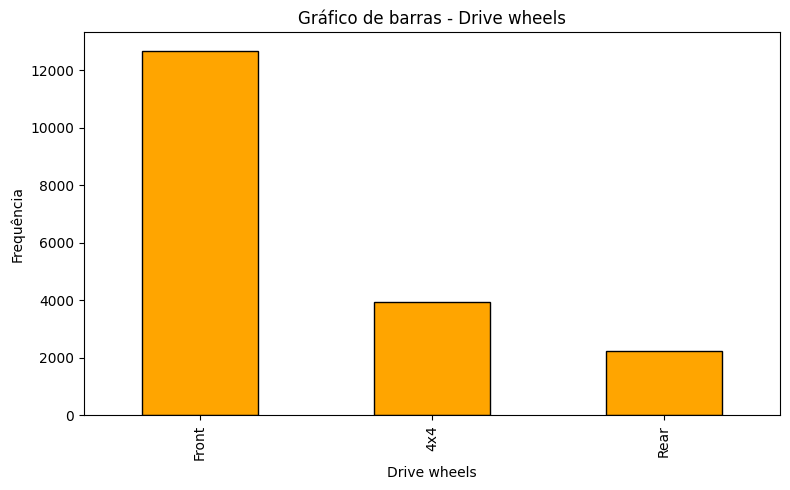

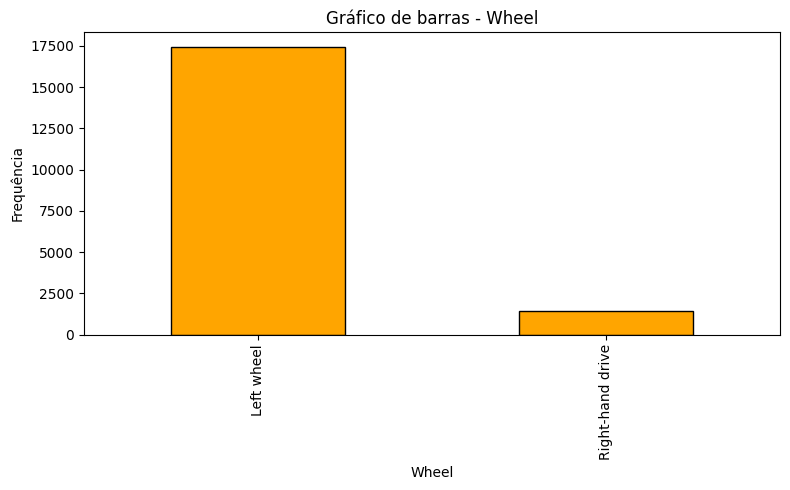

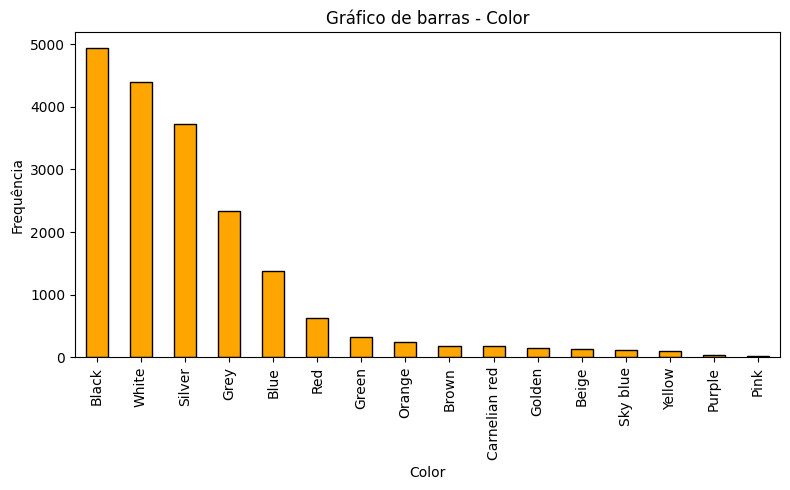

In [1575]:
# Gráficos de barras
for col in colunas_qualitativas:
    plt.figure(figsize=(8, 5))

    if col == 'Manufacturer':
        # Top 15 fabricantes mais frequentes, barras horizontais
        fabricantes = cars[col].value_counts().nlargest(15)
        fabricantes.plot(kind='barh', color='orange', edgecolor='black')
        plt.title(f'Top 10 Fabricantes mais frequentes')
        plt.xlabel('Frequência')
        plt.ylabel('Manufacturer')
        plt.gca().invert_yaxis()  # Para mostrar a fabricante mais frequente no topo

    elif col == 'Model':
        # Top 15 modelos mais frequentes, barras horizontais
        modelos = cars[col].value_counts().nlargest(15)
        modelos.plot(kind='barh', color='orange', edgecolor='black')
        plt.title(f'Top 10 Modelos mais frequentes')
        plt.xlabel('Frequência')
        plt.ylabel('Model')
        plt.gca().invert_yaxis()  # Para mostrar o modelo mais frequente no topo

    else:
        # Para as outras colunas, mantém o gráfico de barras vertical
        cars[col].value_counts().plot(kind='bar', color='orange', edgecolor='black')
        plt.title(f'Gráfico de barras - {col}')
        plt.xlabel(col)
        plt.ylabel('Frequência')

    plt.tight_layout()
    plt.show()

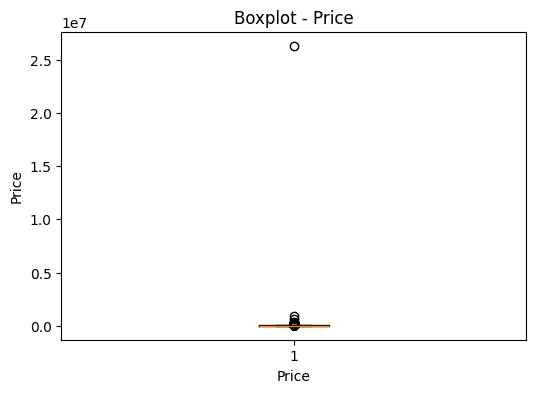

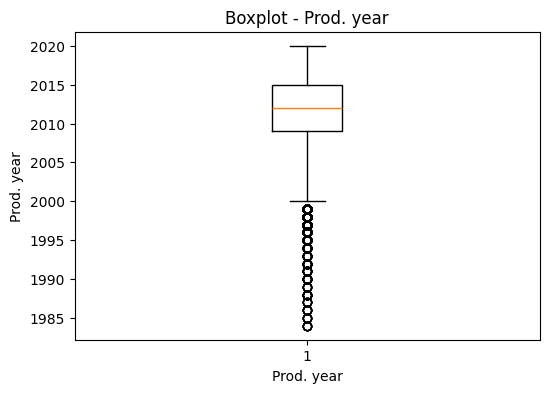

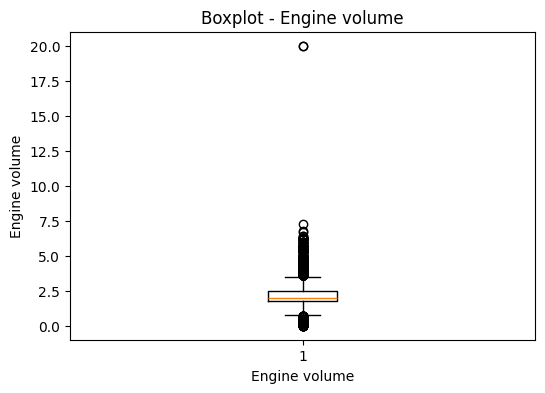

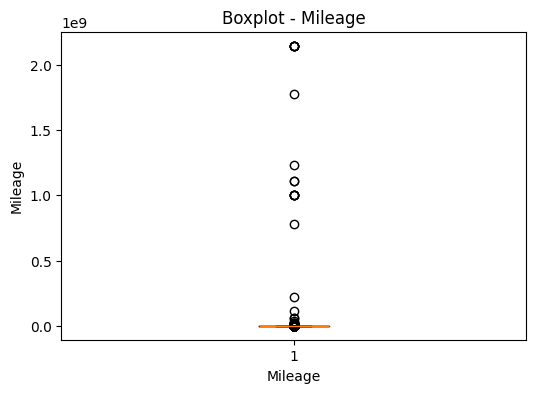

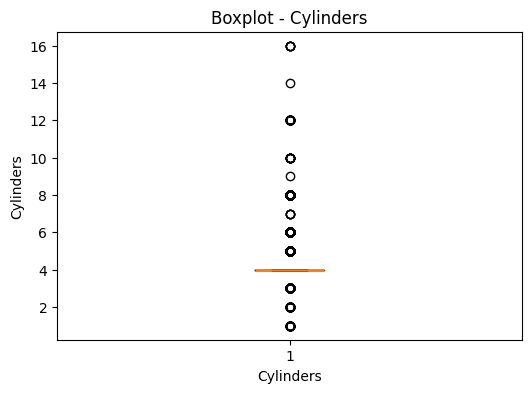

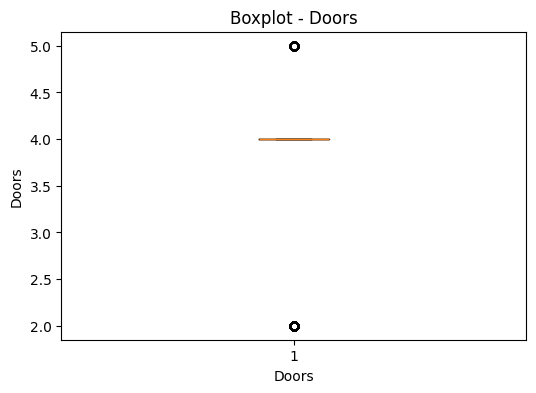

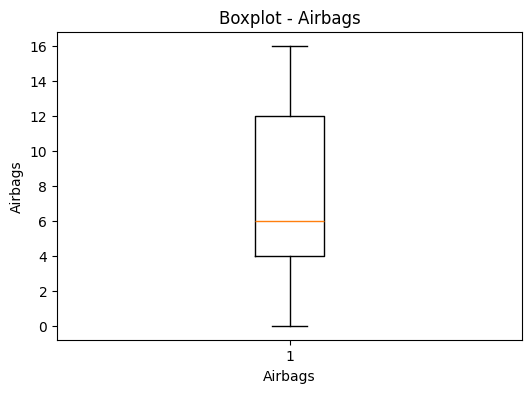

In [1576]:
# Boxplots
for col in colunas_quantitativas:
    plt.figure(figsize=(6,4))
    plt.boxplot(cars[col].dropna())
    plt.title(f'Boxplot - {col}')
    plt.xlabel(col)
    plt.ylabel(col)
    plt.show()

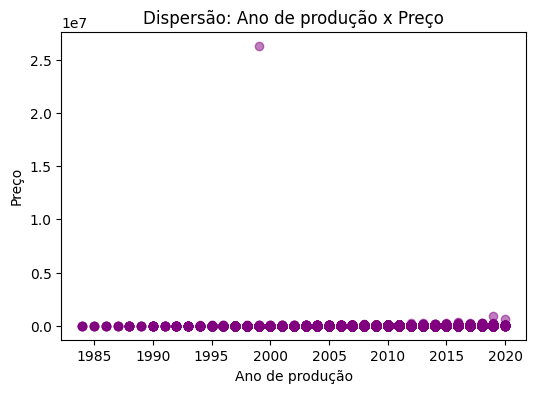

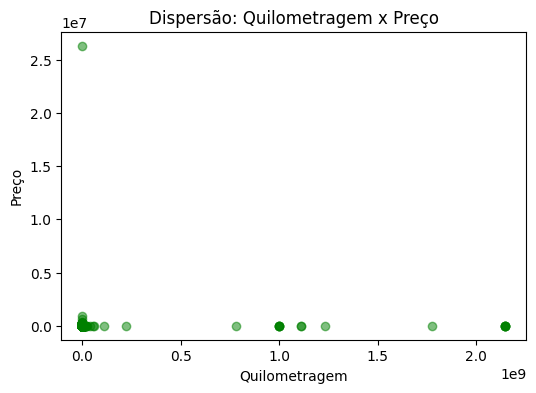

In [1577]:
# Gráficos de Dispersão

plt.figure(figsize=(6,4))
plt.scatter(cars['Prod. year'], cars['Price'], alpha=0.5, color='purple')
plt.title('Dispersão: Ano de produção x Preço')
plt.xlabel('Ano de produção')
plt.ylabel('Preço')
plt.show()

# Exemplo 2: Preço vs Quilometragem
plt.figure(figsize=(6,4))
plt.scatter(cars['Mileage'], cars['Price'], alpha=0.5, color='green')
plt.title('Dispersão: Quilometragem x Preço')
plt.xlabel('Quilometragem')
plt.ylabel('Preço')
plt.show()

In [1578]:
# Verificar valores ausentes

print("\nValores Ausentes no Dataset:")
cars.isnull().sum()


Valores Ausentes no Dataset:


,0
ID,0
Price,0
Levy,0
Manufacturer,0
Model,0
Prod. year,0
Category,0
Leather interior,0
Fuel type,0
Engine volume,0
